# 安裝套件模組

```
pip install pandas
pip install jieba
pip install GoogleNews
pip install matplotlib
pip install Pillow
pip install numpy
pip install scipy
pip install wordcloud
```

PYPI 對應套件簡介
- [GoogleNews](https://pypi.org/project/GoogleNews/)
- [jieba](https://pypi.org/project/jieba/)
- [wordcloud](https://pypi.org/project/wordcloud/)
- [matplotlib](https://pypi.org/project/matplotlib/)
- [PIL](https://pypi.org/project/Pillow/)
- [pandas](https://pypi.org/project/pandas/)
- [numpy](https://pypi.org/project/numpy/)
- [scipy](https://pypi.org/project/scipy/)



In [28]:
# 匯入模組
import pandas as pd
import jieba
from GoogleNews import GoogleNews
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime
from PIL import Image
import numpy as np
from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, ImageColorGenerator


需要知道的觀念和套件：

1. Pandas 資料處理
2. GoogleNews 爬蟲套件
3. WordCloud 文字雲套件
4. Image.open 讀取圖片
5. numpy 陣列操作
6. jieba 斷詞套件
7. datetime 日期處理


# 初始化 Google News 物件

In [29]:
# Google News初始化設定
googlenews = GoogleNews(lang='zh-tw', region='TW', encode='utf-8')

# 啟用除錯模式 try except
googlenews.enableException(True)

In [30]:
object = GoogleNews()

print(object)
print(type(object))
print("object 可以使用的屬性跟方法")
print(dir(object))

<class 'GoogleNews.GoogleNews'>
object 可以使用的屬性跟方法
['_GoogleNews__encode', '_GoogleNews__end', '_GoogleNews__exception', '_GoogleNews__lang', '_GoogleNews__links', '_GoogleNews__period', '_GoogleNews__results', '_GoogleNews__section', '_GoogleNews__start', '_GoogleNews__texts', '_GoogleNews__topic', '_GoogleNews__totalcount', '_GoogleNews__version', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'build_response', 'clear', 'enableException', 'getVersion', 'get_links', 'get_news', 'get_page', 'get_texts', 'getpage', 'gettext', 'headers', 'page_at', 'remove_after_last_fullstop', 'result', 'results', 'search', 'setTimeRange', 'set_encode', 'set_lang', 'set_period', 'set_section', 'set_time_range', '

In [31]:
object.set_encode('utf-8')
print(object._GoogleNews__encode)
print(object.__dict__)

utf-8
{'_GoogleNews__texts': [], '_GoogleNews__links': [], '_GoogleNews__results': [], '_GoogleNews__totalcount': 0, 'user_agent': 'Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:64.0) Gecko/20100101 Firefox/64.0', '_GoogleNews__lang': 'en', 'headers': {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:64.0) Gecko/20100101 Firefox/64.0'}, '_GoogleNews__period': '', '_GoogleNews__start': '', '_GoogleNews__end': '', '_GoogleNews__encode': 'utf-8', '_GoogleNews__exception': False, '_GoogleNews__version': '1.6.15', '_GoogleNews__topic': None, '_GoogleNews__section': None}


<GoogleNews.GoogleNews object at 0x123a83d70> 物件 記憶體位置

<class 'GoogleNews.GoogleNews'> 哪個類別 資料型態


{'_GoogleNews__texts': [], '_GoogleNews__links': [], '_GoogleNews__results': [], '_GoogleNews__totalcount': 0, 'user_agent': 'Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:64.0) Gecko/20100101 Firefox/64.0', '_GoogleNews__lang': 'en', 'headers': {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:64.0) Gecko/20100101 Firefox/64.0'}, '_GoogleNews__period': '', '_GoogleNews__start': '', '_GoogleNews__end': '', '_GoogleNews__encode': 'utf-8', '_GoogleNews__exception': False, '_GoogleNews__version': '1.6.15', '_GoogleNews__topic': None, '_GoogleNews__section': None} 物件的屬性

_ 底線開頭的，類似私有屬性，不希望被外部直接訪問，用方法存取

物件的方法

build_response', 'clear', 'enableException', 'getVersion', 'get_links', 'get_news', 'get_page', 'get_texts', 'getpage', 'gettext', 'headers', 'page_at', 'remove_after_last_fullstop', 'result', 'results', 'search', 'setTimeRange', 'set_encode', 'set_lang', 'set_period', 'set_section', 'set_time_range', 'set_topic', 'setencode', 'setlang', 'setperiod', 'total_count', 'user_agent'


# 使用者輸入關鍵字

In [32]:
# , period='1d'
set_time = input("請輸入要搜尋的時間 (1d, 7d, 30d): ")
googlenews.set_period(set_time)
# 使用者輸入關鍵字
keyword = input("請輸入要搜尋的關鍵字: ")
# keyword = "柯文哲"
googlenews.search(keyword)

In [33]:
# test
result = googlenews.result()
print(f"標題: {result[0]['title']}")

標題: 颱風生成偏少?至今僅18個 氣象專家:正常範圍偏少 ｜十點不一樣20241002 @TVBSNEWS01



# 顯示搜尋結果

In [34]:
# 獲取搜尋結果
result = googlenews.result()

# 顯示新聞標題和連結
for item in result:
    print(f"標題: {item['title']}")
    print(f"連結: {item['link']}")
    print('---')

標題: 颱風生成偏少?至今僅18個 氣象專家:正常範圍偏少 ｜十點不一樣20241002 @TVBSNEWS01
連結: https://www.youtube.com/watch%3Fv%3DX_0gECybLbk&ved=2ahUKEwikoYyR9--IAxWYkq8BHdAiPPcQxfQBegQIBBAC&usg=AOvVaw1UIrEyr8dS0R581v4p5UZG
---
標題: 颱風天物資搶光！這牌鮮奶滯銷 網：感謝台灣人沒忘記過去
連結: https://news.ltn.com.tw/news/life/breakingnews/4818510&ved=2ahUKEwikoYyR9--IAxWYkq8BHdAiPPcQxfQBegQICRAC&usg=AOvVaw0jYAhx4Dti8hvHEGiXKWGr
---
標題: 【吳宇舒晚報】 【山陀兒颱風】颱風擾郵輪行！說好會員免費搭旅客晚報到控遭丟包2024／10／02@newsebc
連結: https://www.youtube.com/watch%3Fv%3DDusuLXJpp-0&ved=2ahUKEwikoYyR9--IAxWYkq8BHdAiPPcQxfQBegQIAxAC&usg=AOvVaw3_bgpYQOBJYOr4v7d405Xn
---
標題: 台中明颱風假！多數醫院正常門診 中榮開颱風特別門診
連結: https://health.ltn.com.tw/article/breakingnews/4818602&ved=2ahUKEwikoYyR9--IAxWYkq8BHdAiPPcQxfQBegQIBRAC&usg=AOvVaw0_8oFFcBp95HZNsOq50L3t
---
標題: 山陀兒颱風3日又要轉彎？日本預測「回馬槍再襲南部」，民間傳說恐破功
連結: https://www.storm.mg/lifestyle/5248147&ved=2ahUKEwikoYyR9--IAxWYkq8BHdAiPPcQxfQBegQIBhAC&usg=AOvVaw3PMf4Sz_hCkBjCcv2fUz1e
---
標題: 【山陀兒颱風】綠扯颱風假救樑 氣象署曝原估有風雨 4縣市顧及市民安全 @newsebc
連結: https://www.youtube.com/watch%

# 儲存成 Json 格式檔案

In [35]:
# <!-- 儲存至 Json -->
import json

from datetime import datetime

# 獲取當前日期
today = datetime.now().strftime('%Y%m%d')

# 生成文件名
filename = f"./json_output/{today}_{keyword}_{set_time}.json"

# 將 result 寫入 JSON 文件
with open(filename, 'w', encoding='utf-8') as f:
    json.dump(result, f, ensure_ascii=False, indent=4)

print(f"搜尋結果已儲存為: {filename}")


搜尋結果已儲存為: ./json_output/20241002_颱風_7d.json


# 讀取靜態 Json 格式檔案

In [36]:
import json
# filename = "./json_output/20240919_柯文哲_15d.json"
# 讀取 JSON 文件
with open(filename, 'r', encoding='utf-8') as f:
    loaded_result = json.load(f)

print(loaded_result)
print(type(loaded_result))


[{'title': '颱風生成偏少?至今僅18個 氣象專家:正常範圍偏少 ｜十點不一樣20241002 @TVBSNEWS01', 'media': 'YouTube', 'date': '2 分鐘前', 'datetime': nan, 'desc': '歷史紀錄的平均值，西北太平洋生成颱風數26.5個，但今年都已經來到10月份了，山陀兒算是第18個，似乎有點偏少，引起各方關注，而且颱風更是從8月份開始像在趕進度似的，...', 'link': 'https://www.youtube.com/watch%3Fv%3DX_0gECybLbk&ved=2ahUKEwikoYyR9--IAxWYkq8BHdAiPPcQxfQBegQIBBAC&usg=AOvVaw1UIrEyr8dS0R581v4p5UZG', 'img': 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='}, {'title': '颱風天物資搶光！這牌鮮奶滯銷 網：感謝台灣人沒忘記過去', 'media': '自由時報', 'date': '8 分鐘前', 'datetime': nan, 'desc': '吳裕堯／核稿編輯社群平台Threads一則貼文掀起熱烈討論，文中附上的超市鮮奶區照片顯示，颱風天前夕物資被搶購一空，味全鮮奶依然滯銷，引發眾多網友留言感謝大家沒有忘記...', 'link': 'https://news.ltn.com.tw/news/life/breakingnews/4818510&ved=2ahUKEwikoYyR9--IAxWYkq8BHdAiPPcQxfQBegQICRAC&usg=AOvVaw0jYAhx4Dti8hvHEGiXKWGr', 'img': 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='}, {'title': '【吳宇舒晚報】 【山陀兒颱風】颱風擾郵輪行！說好會員免費搭旅客晚報到控遭丟包2024／10／02@newsebc', 'media': 'YouTube', 'date': '2 分鐘前', 'date

In [37]:
# 查看資料 資料分類 資料合併 練習

title_tokens = []
desc_tokens = []

all_content = []

for n in range(len(loaded_result)):

    title = loaded_result[n]['title']
    desc = loaded_result[n]['desc']  
    title_tokens.append(loaded_result[n]['title'])
    desc_tokens.append(loaded_result[n]['desc'])
    all_content.append(title + " " + desc)

print(title_tokens)
print(desc_tokens)
print(all_content)
# for item in all_content:
#     print("".join(item))
    




['颱風生成偏少?至今僅18個 氣象專家:正常範圍偏少 ｜十點不一樣20241002 @TVBSNEWS01', '颱風天物資搶光！這牌鮮奶滯銷 網：感謝台灣人沒忘記過去', '【吳宇舒晚報】 【山陀兒颱風】颱風擾郵輪行！說好會員免費搭旅客晚報到控遭丟包2024／10／02@newsebc', '台中明颱風假！多數醫院正常門診 中榮開颱風特別門診', '山陀兒颱風3日又要轉彎？日本預測「回馬槍再襲南部」，民間傳說恐破功', '【山陀兒颱風】綠扯颱風假救樑 氣象署曝原估有風雨 4縣市顧及市民安全 @newsebc', '山陀兒襲台「連放颱風假」 恐衝擊薪水發放！', '【吳宇舒晚報】 【山陀兒颱風】獨家》「山陀兒」牛步進逼蘭嶼擱淺貨輪慘斷兩截2024／10／02@newsebc', '山陀兒準備「進家門」！颱風核心遭陸地摩擦、持續變弱 專家急籲：不可輕忽', '東港迎王颱風攪局 千歲爺指示王船法會等科儀按表進行']
['歷史紀錄的平均值，西北太平洋生成颱風數26.5個，但今年都已經來到10月份了，山陀兒算是第18個，似乎有點偏少，引起各方關注，而且颱風更是從8月份開始像在趕進度似的，...', '吳裕堯／核稿編輯社群平台Threads一則貼文掀起熱烈討論，文中附上的超市鮮奶區照片顯示，颱風天前夕物資被搶購一空，味全鮮奶依然滯銷，引發眾多網友留言感謝大家沒有忘記...', '【山陀兒颱風】旗津風大雨大浪大民眾穿越封鎖線冒險觀浪【山陀兒颱風】抗戰防淹水！銀行水閘門增高ATM被迫暫停服務【山陀兒颱風】颱風擾郵輪行！說好會員免費搭旅客晚報...', '山陀兒颱風逼近，因氣象署預估台中市明日符合停班課標準，台中市晚間8點宣佈明天停止上班上課，台中將連放2天颱風假，包括中國醫藥大學附設醫院及台中醫院均門診正常服務，...', '山陀兒颱風滯留台灣西南部許久，今（2）日終於動起來北上，雖然中心還是有些許滯留狀況，不過暴風圈已進入雲林以南及臺東陸地，對新竹以南、南投、宜蘭、花蓮、臺東地區及...', '颱風山陀兒影響持續，基北北桃宣布10月2號放颱風假，但這個決定，是否達「放假條件」引發討論，也讓綠營質疑是不是趁機救謝國樑？對此，台北市長蔣萬安還原決策過程，...', '颱風「山陀兒」怠速前進，目前會不會連續放2到3天以上颱風假還很難說，但有民間單位苦惱，這樣下去5日薪資可能無法如期

# 停用詞過濾

In [38]:
# ckip-transformers  0.3.4 

In [39]:
import re
import time
from ckip_transformers import __version__
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker


# Initialize drivers
# 初始化斷詞WS、詞性標記POS、命名實體辨識NER
print("Initializing drivers ... WS")
ws_driver = CkipWordSegmenter(model="bert-base")
print("Initializing drivers ... POS")
pos_driver = CkipPosTagger(model="bert-base")
print("Initializing drivers ... NER")
ner_driver = CkipNerChunker(model="bert-base")
print("Initializing drivers ... done")

def process_text(text):
    # 選取所有 “不是 ＾” 中文（\u4e00-\u9fff）、英文、數字及空格
    pattern = re.compile(r'[^\u4e00-\u9fffA-Za-z0-9\s]')
    # 用空字元取代符合 pattern 的字串
    return pattern.sub('', text)

sentences = []

for item in all_content:
    cleaned_text = process_text(item)
    print(cleaned_text)
    sentences.append(cleaned_text)
    


# 應該用有限制條件去剃掉那些多種不想要的

# - 初始化斷詞（WS）、命名實體辨識（NER）輸入格式 ----> 必須是句子的串列（list of sentences）
# - 詞性標記（POS）輸入格式 ----> 必須是詞串列的串列（list of list of words，來自斷詞的輸出）

all_words = []


# print("\n斷詞結果：")
ws_results = ws_driver(sentences)

all_pos = []

# 執行詞性標記
# print("\n詞性標記結果：")
pos_results = pos_driver(ws_results)
for sentence in pos_results:
    # print(sentence)
    # print(type(sentence))
    
    for pos in sentence:
        all_pos.append(pos)

print(f"總詞性數: {len(all_pos)}")


# print(ws_results)
# print(type(ws_results[0]))
for n, sentence in enumerate(ws_results):
    print(f"句子 {n}:{sentence}")
    # print(len(sentence))
    # print(f"資料型態: {type(sentence)}")
    # print(type(sentence))
    
    # 遍歷每個句子的詞與對應的詞性標註
    for word, pos in zip(sentence, pos_results[n]):
        # 判斷條件：非空字串、詞長度大於1，且詞性為名詞(N)或動詞(V)
        if word.strip() and len(word) > 1 and (pos.startswith('N') or pos.startswith('V')):
            all_words.append(word)
            
    # or all_words.extend(sentence) 把可迭代對象的元素逐個添加到列表的末尾

print("\n所有詞的列表:")
print(all_words)
print(f"總詞數: {len(all_words)}")


# 學習資源附上的的文章教學有比較乾淨的寫法 用 double zip 



Initializing drivers ... WS
Initializing drivers ... POS
Initializing drivers ... NER
Initializing drivers ... done
颱風生成偏少至今僅18個 氣象專家正常範圍偏少 十點不一樣20241002 TVBSNEWS01 歷史紀錄的平均值西北太平洋生成颱風數265個但今年都已經來到10月份了山陀兒算是第18個似乎有點偏少引起各方關注而且颱風更是從8月份開始像在趕進度似的
颱風天物資搶光這牌鮮奶滯銷 網感謝台灣人沒忘記過去 吳裕堯核稿編輯社群平台Threads一則貼文掀起熱烈討論文中附上的超市鮮奶區照片顯示颱風天前夕物資被搶購一空味全鮮奶依然滯銷引發眾多網友留言感謝大家沒有忘記
吳宇舒晚報 山陀兒颱風颱風擾郵輪行說好會員免費搭旅客晚報到控遭丟包20241002newsebc 山陀兒颱風旗津風大雨大浪大民眾穿越封鎖線冒險觀浪山陀兒颱風抗戰防淹水銀行水閘門增高ATM被迫暫停服務山陀兒颱風颱風擾郵輪行說好會員免費搭旅客晚報
台中明颱風假多數醫院正常門診 中榮開颱風特別門診 山陀兒颱風逼近因氣象署預估台中市明日符合停班課標準台中市晚間8點宣佈明天停止上班上課台中將連放2天颱風假包括中國醫藥大學附設醫院及台中醫院均門診正常服務
山陀兒颱風3日又要轉彎日本預測回馬槍再襲南部民間傳說恐破功 山陀兒颱風滯留台灣西南部許久今2日終於動起來北上雖然中心還是有些許滯留狀況不過暴風圈已進入雲林以南及臺東陸地對新竹以南南投宜蘭花蓮臺東地區及
山陀兒颱風綠扯颱風假救樑 氣象署曝原估有風雨 4縣市顧及市民安全 newsebc 颱風山陀兒影響持續基北北桃宣布10月2號放颱風假但這個決定是否達放假條件引發討論也讓綠營質疑是不是趁機救謝國樑對此台北市長蔣萬安還原決策過程
山陀兒襲台連放颱風假 恐衝擊薪水發放 颱風山陀兒怠速前進目前會不會連續放2到3天以上颱風假還很難說但有民間單位苦惱這樣下去5日薪資可能無法如期發放位於高雄的方舟就業服務協會理事長王姿琦
吳宇舒晚報 山陀兒颱風獨家山陀兒牛步進逼蘭嶼擱淺貨輪慘斷兩截20241002newsebc 山陀兒颱風獨家山陀兒牛步進逼蘭嶼擱淺貨輪慘斷兩截山陀兒颱風急搶修枋寮狂浪沖垮堤防30尺缺口釀海水倒灌山陀兒颱風山陀兒挾強風豪雨襲台東卑南
山陀兒準備進家門颱

Inference: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

總詞性數: 547
句子 0:['颱風', '生成', '偏', '少', '至今', '僅', '18', '個', ' ', '氣象', '專家', '正常', '範圍', '偏', '少', ' ', '十', '點', '不', '一樣', '20241002', ' TVBSNEWS01 ', '歷史', '紀錄', '的', '平均值', '西北', '太平洋', '生成', '颱風', '數', '265', '個', '但', '今年', '都', '已經', '來到', '10月份', '了', '山陀兒', '算是', '第18', '個', '似乎', '有點', '偏', '少', '引起', '各', '方', '關注', '而且', '颱風', '更', '是', '從', '8月份', '開始', '像', '在', '趕', '進度', '似的']
句子 1:['颱風天', '物資', '搶光', '這', '牌', '鮮奶', '滯銷', ' 網', '感謝', '台灣人', '沒', '忘記', '過去', ' ', '吳裕堯', '核稿', '編輯', '社群', '平台', 'Threads', '一', '則', '貼文', '掀起', '熱烈', '討論', '文', '中', '附上', '的', '超市', '鮮奶區', '照片', '顯示', '颱風天', '前夕', '物資', '被', '搶購', '一', '空', '味全', '鮮奶', '依然', '滯銷', '引發', '眾多', '網友', '留言', '感謝', '大家', '沒有', '忘記']
句子 2:['吳宇舒', '晚報', ' ', '山陀兒', '颱風', '颱風', '擾', '郵輪行', '說好', '會員', '免費', '搭', '旅客', '晚報', '到', '控', '遭', '丟包', '20241002', 'newsebc ', '山陀兒', '颱風', '旗津', '風', '大雨', '大浪', '大', '民眾', '穿越', '封鎖線', '冒險', '觀浪', '山陀兒', '颱風', '抗戰', '防', '淹水', '銀行', '水閘門', '增高', 'ATM', '被迫', '暫停', '服務', '

In [40]:
import re
import jieba.analyse

# 讀取停用詞
with open(r'./stopword.txt', 'r', encoding='utf-8') as file:
    stopword = file.read().splitlines() # BIF splitlines
    # print(stopword)

# 合併標題和描述，\n 是方便閱讀，可以不用加
all_content = ""
for item in loaded_result:
    all_content += item['title'] + "\n"
    if 'desc' in item:
        all_content += item['desc'] + "\n"
    all_content += "\n"

# print("原始內容:")
# print(all_content)

print("斷詞結果:")
seg_list = jieba.lcut(all_content)
print(seg_list)
print("--"*60)

# 原本的正則表達式
# english_pattern = re.compile(r'^[a-zA-Z]+$')

# def is_english(text):
#     return bool(english_pattern.match(text))

# 過濾停用詞和空白字符
filtered_words = []
for word in seg_list:
    # 去除詞的前後空白 跟上面產生的 \n
    cleaned_word = word.strip()
    
    cleaned_word = re.sub(r'[^\u4e00-\u9fffA-Za-z0-9\s]', '', cleaned_word)
    # re.sub(pattern, repl, string, count=0)
    # 檢查詞是否為空且不在停用詞列表中
    if cleaned_word and cleaned_word not in stopword:
        filtered_words.append(cleaned_word)

print('過濾後的結果: ')
print(len(filtered_words))
print("--"*60)

# 使用 jieba TF-IDF 算法提取關鍵詞
tags = jieba.analyse.extract_tags("".join(filtered_words), topK=10, withWeight=True)

# print("\n提取的關鍵詞:")
# print("Tags type:", type(tags))
# print("Tags content:", tags)

top_50_tags = [tag for tag, _ in tags]

second_filtered_words = []
print("\nTF-IDF 關鍵詞及其權重:")
for tag_tuple in tags:
    tag = tag_tuple[0]
    weight = tag_tuple[1]
    print(f"{tag}: {int(weight * 10000)}")
    
for word in filtered_words:
    if word in top_50_tags:
        second_filtered_words.append(word)

# 使用 TextRank 算法提取關鍵詞
textrank_tags = jieba.analyse.textrank("".join(filtered_words), topK=10, withWeight=True)

# print("\nTextRank 提取的關鍵詞:")
# print("TextRank Tags type:", type(textrank_tags))
# print("TextRank Tags content:", textrank_tags)

top_50_textrank_tags = [tag for tag, _ in textrank_tags]

third_filtered_words = []
print("\nTextRank 關鍵詞及其權重:")
for tag_tuple in textrank_tags:
    tag = tag_tuple[0]
    weight = tag_tuple[1]
    print(f"{tag}: {weight:.4f}")
    
for word in filtered_words:
    if word in top_50_textrank_tags:
        third_filtered_words.append(word)

print("--"*60)
print("第一種過濾後的結果 (TF-IDF): ")
print(second_filtered_words)
print(len(second_filtered_words))

print("--"*60)
print("第二種過濾後的結果 (TextRank): ")
print(third_filtered_words)
print(len(third_filtered_words))
        
# You can choose which filtered words to use for further processing
# filtered_words = second_filtered_words  # Using TF-IDF results
# filtered_words = third_filtered_words  # Using TextRank results


斷詞結果:
['颱', '風', '生成', '偏少', '?', '至今', '僅', '18', '個', ' ', '氣象', '專家', ':', '正常', '範圍', '偏少', ' ', '｜', '十點', '不', '一樣', '20241002', ' ', '@', 'TVBSNEWS01', '\n', '歷史', '紀錄', '的', '平均值', '，', '西北', '太平洋', '生成', '颱', '風數', '26.5', '個', '，', '但', '今年', '都', '已', '經來', '到', '10', '月份', '了', '，', '山陀兒', '算是', '第', '18', '個', '，', '似乎', '有點', '偏少', '，', '引起', '各方', '關注', '，', '而且', '颱', '風', '更是', '從', '8', '月份', '開始', '像', '在', '趕', '進度', '似的', '，', '...', '\n', '\n', '颱', '風天物資', '搶光', '！', '這牌', '鮮奶', '滯銷', ' ', '網', '：', '感謝', '台灣', '人', '沒', '忘', '記過', '去', '\n', '吳裕堯', '／', '核稿', '編輯', '社群', '平台', 'Threads', '一則', '貼文', '掀起', '熱烈', '討論', '，', '文中', '附上', '的', '超市', '鮮奶區', '照片', '顯示', '，', '颱', '風天', '前夕', '物資', '被', '搶購', '一空', '，', '味全', '鮮奶', '依然', '滯銷', '，', '引發眾', '多', '網友', '留言', '感謝', '大家', '沒有', '忘記', '...', '\n', '\n', '【', '吳宇', '舒晚', '報', '】', ' ', '【', '山陀兒', '颱', '風', '】', '颱', '風擾', '郵輪行', '！', '說', '好會員', '免費', '搭', '旅客', '晚報', '到', '控遭', '丟包', '2024', '／', '10', '／', 


   - `^` 表示字符串的開始
   - `[a-zA-Z]` 表示任何英文字母（大寫或小寫）
   - `+` 表示前面的字符至少出現一次
   - `$` 表示字符串的結束
   -  `.*`：匹配任意字符（除換行符外）零次或多次

In [41]:
import re

english_pattern = re.compile(r'^[a-zA-Z]+$')

def process_text(text):
    return bool(english_pattern.match(text))



# 計算文字出現次數

In [42]:
# 使用 BIF Counter 計算詞頻
word_count = Counter(filtered_words)
print(word_count)
print(type(word_count))
print(dir(word_count))

print("--"*60)

print("word_count.items():")
print(word_count.items())
print(type(word_count.items()))

print("--"*60)

# 將 word_count 轉換為 dict
# word_count_dict = dict(word_count)
# 欸？ counter 轉 dict 後，key 的順序改變了

from collections import OrderedDict
word_count_dict = OrderedDict(word_count.most_common())

print("word_count_dict:")
print(word_count_dict)
print(type(word_count_dict))
print(f"字典數量: {len(word_count_dict)}")
print("--"*60)

 

Counter({'颱': 33, '山陀兒': 22, '風': 18, '風假': 5, '但': 4, '10': 4, '偏少': 3, '正常': 3, '到': 3, '說': 3, 'newsebc': 3, '醫院': 3, '門診': 3, '及': 3, '東港': 3, '生成': 2, '18': 2, '氣象': 2, '專家': 2, '已': 2, '月份': 2, '鮮奶': 2, '滯銷': 2, '感謝': 2, '台灣': 2, '討論': 2, '被': 2, '吳宇': 2, '舒晚': 2, '報': 2, '風擾': 2, '郵輪行': 2, '好會員': 2, '免費': 2, '搭': 2, '旅客': 2, '晚報': 2, '2024': 2, '服務': 2, '台中市': 2, '連放': 2, '天': 2, '中': 2, '日': 2, '於': 2, '以南': 2, '臺': 2, '地': 2, '救': 2, '樑': 2, '持續': 2, '長': 2, '發放': 2, '獨家': 2, '牛步': 2, '進逼蘭嶼': 2, '擱淺': 2, '貨輪': 2, '慘斷': 2, '兩截': 2, '核心': 2, '摩擦': 2, '攪局': 2, '科儀': 2, '祭典': 2, '至今': 1, '僅': 1, '範圍': 1, '十點': 1, '不': 1, '一樣': 1, '20241002': 1, 'TVBSNEWS01': 1, '歷史': 1, '紀錄': 1, '平均值': 1, '西北': 1, '太平洋': 1, '風數': 1, '265': 1, '今年': 1, '都': 1, '經來': 1, '算是': 1, '第': 1, '似乎': 1, '有點': 1, '引起': 1, '各方': 1, '關注': 1, '而且': 1, '更是': 1, '從': 1, '開始': 1, '像': 1, '趕': 1, '進度': 1, '似的': 1, '風天物資': 1, '搶光': 1, '這牌': 1, '網': 1, '人': 1, '沒': 1, '忘': 1, '記過': 1, '去': 1, '吳裕堯': 1, '核稿': 1, '編輯':

# 從字典取出資料

字典可以使用的方法
['clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 

'pop', 'popitem', 'setdefault', 'update', 'values']


In [43]:
# print(dir(word_count_dict))
# print(word_count_dict.items())
# print(type(word_count_dict.items()))
# print(word_count_dict.keys())
# words = list(word_count_dict.keys())
# counts = list(word_count_dict.values())

# items ===> 同時取出 key 和 value 就可以直接加入 dataframe

words = []
counts = []

print("--"*60)

for key in word_count_dict:
    print(key, word_count_dict[key])
    words.append(key)
    counts.append(word_count_dict[key])

# words = [key for key in word_count_dict]
# counts = [word_count_dict[key] for key in word_count_dict]

print(words)
print(counts)

print("--"*60)

------------------------------------------------------------------------------------------------------------------------
颱 33
山陀兒 22
風 18
風假 5
但 4
10 4
偏少 3
正常 3
到 3
說 3
newsebc 3
醫院 3
門診 3
及 3
東港 3
生成 2
18 2
氣象 2
專家 2
已 2
月份 2
鮮奶 2
滯銷 2
感謝 2
台灣 2
討論 2
被 2
吳宇 2
舒晚 2
報 2
風擾 2
郵輪行 2
好會員 2
免費 2
搭 2
旅客 2
晚報 2
2024 2
服務 2
台中市 2
連放 2
天 2
中 2
日 2
於 2
以南 2
臺 2
地 2
救 2
樑 2
持續 2
長 2
發放 2
獨家 2
牛步 2
進逼蘭嶼 2
擱淺 2
貨輪 2
慘斷 2
兩截 2
核心 2
摩擦 2
攪局 2
科儀 2
祭典 2
至今 1
僅 1
範圍 1
十點 1
不 1
一樣 1
20241002 1
TVBSNEWS01 1
歷史 1
紀錄 1
平均值 1
西北 1
太平洋 1
風數 1
265 1
今年 1
都 1
經來 1
算是 1
第 1
似乎 1
有點 1
引起 1
各方 1
關注 1
而且 1
更是 1
從 1
開始 1
像 1
趕 1
進度 1
似的 1
風天物資 1
搶光 1
這牌 1
網 1
人 1
沒 1
忘 1
記過 1
去 1
吳裕堯 1
核稿 1
編輯 1
社群 1
平台 1
Threads 1
一則 1
貼文 1
掀起 1
熱烈 1
文中 1
附上 1
超市 1
鮮奶區 1
照片 1
顯示 1
風天 1
前夕 1
物資 1
搶購 1
一空 1
味全 1
依然 1
引發眾 1
多 1
網友 1
留言 1
大家 1
沒有 1
忘記 1
控遭 1
丟包 1
旗津風 1
大雨 1
大浪 1
大民眾 1
穿越 1
封鎖線 1
冒險 1
觀浪 1
抗戰防 1
淹水 1
銀行 1
水閘門 1
增高 1
ATM 1
被迫 1
暫停 1
台中明 1
多數 1
中榮開 1
風特別 1
逼近 1
因氣 1
象署 1
預估 1
明日 1
符合 1
停班課 1
標準 1
晚間 1
點宣 1
佈 1
明天 1
停止 1

# 使用 Pandas 排序呈現資料

練習用 Series 方式加入


In [44]:
# 創建一個 pandas Series，使用單字作為索引，詞頻作為值
word_count_series = pd.Series(data=counts, index=words, name='一維陣列詞頻Series')
print(word_count_series.info())
print(word_count_series.head)
print("--"*60)

<class 'pandas.core.series.Series'>
Index: 360 entries, 颱 to 順
Series name: 一維陣列詞頻Series
Non-Null Count  Dtype
--------------  -----
360 non-null    int64
dtypes: int64(1)
memory usage: 5.6+ KB
None
<bound method NDFrame.head of 颱      33
山陀兒    22
風      18
風假      5
但       4
       ..
天府      1
內       1
各項      1
將依      1
順       1
Name: 一維陣列詞頻Series, Length: 360, dtype: int64>
------------------------------------------------------------------------------------------------------------------------


In [45]:
word_text_series = pd.Series(data=words, name='一維陣列文字Series')
print(word_text_series.info())

print("--"*60)
print(word_text_series.head())

<class 'pandas.core.series.Series'>
RangeIndex: 360 entries, 0 to 359
Series name: 一維陣列文字Series
Non-Null Count  Dtype 
--------------  ----- 
360 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB
None
------------------------------------------------------------------------------------------------------------------------
0      颱
1    山陀兒
2      風
3     風假
4      但
Name: 一維陣列文字Series, dtype: object


In [46]:
# 將單一 Series 轉換為 DataFrame
df = word_count_series.reset_index()
df.columns = ['word', 'count']  # 重命名列
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    360 non-null    object
 1   count   360 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
None
  word  count
0    颱     33
1  山陀兒     22
2    風     18
3   風假      5
4    但      4


In [47]:
# 將多個 Series 轉換為 DataFrame

# 重置兩個 Series 的索引
word_text_series = word_text_series.reset_index(drop=True)
word_count_series = word_count_series.reset_index(drop=True)

# 使用 concat 創建 DataFrame
df = pd.concat([word_text_series, word_count_series], axis=1)

# 重命名列
df.columns = ['word', 'count']

# 顯示 DataFrame 的資訊
print(df.info())

# 顯示 DataFrame 的前幾行
print("DataFrame 預覽：")
print(df.head())

# # 如果需要，可以按計數降序排序
# df_sorted = df.sort_values('count', ascending=False).reset_index(drop=True)

# # 顯示排序後的 DataFrame 前幾行
# print("\n排序後：")
# print(df_sorted.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    360 non-null    object
 1   count   360 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
None
DataFrame 預覽：
  word  count
0    颱     33
1  山陀兒     22
2    風     18
3   風假      5
4    但      4


In [48]:
# 將字典轉 list 放入 DataFrame
df2 = pd.DataFrame(list(word_count_dict.items()), columns=['word', 'count'])


# df_sorted_org = df.sort_values(by='count', ascending=False)
df_sorted = df2.sort_values(by='count', ascending=False).reset_index(drop=True)

print("df2:")
print(df2)
print("--"*60)
print("\ndf_sorted 資料結構:")
print(df_sorted.info())
print("\ndf_sorted:")
print(df_sorted.head)
print("\ndf_sorted 索引:")
print(df_sorted.index)


df2:
    word  count
0      颱     33
1    山陀兒     22
2      風     18
3     風假      5
4      但      4
..   ...    ...
355   天府      1
356    內      1
357   各項      1
358   將依      1
359    順      1

[360 rows x 2 columns]
------------------------------------------------------------------------------------------------------------------------

df_sorted 資料結構:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    360 non-null    object
 1   count   360 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
None

df_sorted:
<bound method NDFrame.head of     word  count
0      颱     33
1    山陀兒     22
2      風     18
3     風假      5
4      但      4
..   ...    ...
355   象署      1
356   因氣      1
357   逼近      1
358  風特別      1
359    順      1

[360 rows x 2 columns]>

df_sorted 索引:
RangeIndex(start=0, stop=360, step=1)


# 製作文字雲圖片遮罩

/Users/larry/Github/Python-WordCloud/TaipeiSansTCBeta-Bold.ttf
(540, 960)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


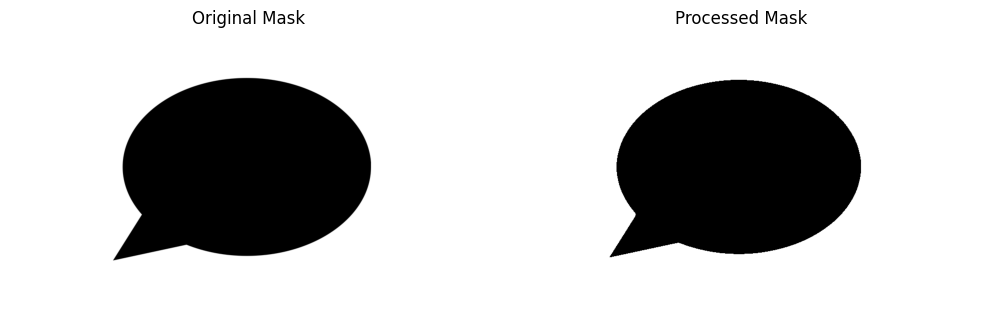

原始x色像素數量：144292，總像素數：1555200（佔比：9.28%）
處理後x色像素數量：144292，總像素數：1555200（佔比：9.28%）


In [49]:
# 正常圖片版本

# from PIL import ImageOps # 反轉黑白
# ImageOps.invert()

# 詢問使用者字體檔案路徑
# font_path_input = input("請輸入中文字體的檔案路徑: ")
font_path_input = "/Users/larry/Github/Python-WordCloud/TaipeiSansTCBeta-Bold.ttf"
print(font_path_input)

# 文字雲圖片遮罩檔案路徑
img_path = "./Mask_Image/Messenge_mask.png"


mask_color = np.array((Image.open(img_path).convert("RGB")).resize((960, 540)))
# mask_color = mask_color[::2, ::2]

total_pixels = mask_color.size
# total_pixels = mask_image.shape[0] * mask_image.shape[1]

org_filtered_pixels = np.sum(np.all(mask_color == 0, axis=2))

mask_image = mask_color.copy()

threshold = 20 # 根據圖片調整閾值
mask_image[np.all(mask_image > threshold, axis=2)] = 255
# 只要是（偏）()色區域，都設為()色
filtered_pixels = np.sum(np.all(mask_image == 0, axis=2))

# 邊緣檢測 (進階用法，此部分為當初課堂老師提供)
# 我的理解：將三個顏色通道做了某個處理，然後將三個通道的結果累加，最後除以 3 得到平均值
edges = np.mean([gaussian_gradient_magnitude(mask_image[:, :, i] / 255., 1) for i in range(3)], axis=0)
print(edges.shape)
print(edges)
# 使用平均值作為閾值
threshold = edges.mean() * 0.2
mask_image[edges > threshold] = 255


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# 顯示原始遮罩圖片
ax1.imshow(mask_color)
ax1.set_title("Original Mask")
ax1.axis('off')

# 顯示處理後的遮罩圖片
ax2.imshow(mask_image)
ax2.set_title("Processed Mask")
ax2.axis('off')

plt.tight_layout()
plt.show()




print(f"原始x色像素數量：{org_filtered_pixels}，總像素數：{total_pixels}（佔比：{org_filtered_pixels/total_pixels*100:.2f}%）")
print(f"處理後x色像素數量：{filtered_pixels}，總像素數：{total_pixels}（佔比：{filtered_pixels/total_pixels*100:.2f}%）")

# 將高於閾值的邊緣像素設為白色

# 顏色生成
image_colors = ImageColorGenerator(mask_image)
# image_colors.default_color = [0.9,0.9,0.9]


In [50]:
# 選擇黑色遮罩圖案練習處理圖片

# # from PIL import ImageOps # 反轉黑白
# # ImageOps.invert()

# # 詢問使用者字體檔案路徑
# # font_path_input = input("請輸入中文字體的檔案路徑: ")
# font_path_input = "/Users/larry/Github/Python-WordCloud/TaipeiSansTCBeta-Bold.ttf"
# print(font_path_input)
# # 文字雲圖片遮罩檔案路徑
# img_path = "./Mask_Image/LeafDrak_mask.png"

# # 讀取遮罩圖片，轉換為 RGB，調整大小，然後轉換為 numpy 陣列
# # mask_color = np.array(Image.open(img_path).convert("RGB").resize((960, 540)))

# # 轉灰階
# mask_color = np.array((Image.open(img_path).convert("L")).resize((960, 540)))
# # 查看 mask_color 的類型和屬性
# print("Type of mask_color:", type(mask_color))
# print("Shape of mask_color:", mask_color.shape)
# print("Data type of mask_color:", mask_color.dtype)
# # print("Attributes and methods of array:", dir(mask_color))
# total_pixels = mask_color.size
# # org_filtered_pixels = np.sum(np.all(mask_image == 255, axis=2))
# org_pixels = np.sum(mask_color == 255)

# # 縮小
# # # 每隔 n 個像素取一個像素
# # # mask_color = mask_color[::4, ::4]

# # # 放大（重複像素）
# # mask_color_large = np.repeat(np.repeat(mask_color, 4, axis=0), 4, axis=1)

# # 進行二次處理，保留灰階
# mask_image = mask_color.copy()
# # 不使用模組，numpy 反轉處理方式
# # mask_image = 255 - mask_color
# # 去噪應用
# threshold1 = 190
# threshold2 = 20
# # mask_image[np.all(mask_image < threshold, axis=2)] = 255
# mask_image[mask_image < threshold2] = 0
# mask_image[mask_image > threshold1] = 255

# # 只要是（偏）()色區域，都設為()色

# # 高級用法，感謝 GPT 的解釋，真的是很厲害的做法....
# # 0-255 變成 0-1 的數據，然後把 某個閾值以上的數據變成 1，剩下的變成 0
# # 然後再次合成上去

# # 對灰階圖像進行邊緣檢測

# edges = gaussian_gradient_magnitude(mask_image, sigma=0.4)
# # 設置邊緣閾值
# edge_threshold = edges.mean()

# # 創建邊緣遮罩 True 為 1，False 為 0 ---> 1 (資料格式)＊ 255 白色
# edge_mask = (edges > edge_threshold).astype(np.uint8) * 255

# # 將邊緣與原始遮罩結合
# mask_image = np.maximum(mask_image, edge_mask)


# # 三維陣列圖片邊緣檢測 (進階用法，此部分為當初課堂老師提供，要有一定的 numpy 操作陣列觀念後，才比較了解這個做法)

# # 我的理解：將三個顏色通道做了某個處理，然後將三個通道的結果累加，最後除以 3 得到平均值
# # edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i] / 255., 2) for i in range(3)], axis=0)


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# # 顯示原始遮罩圖片
# ax1.imshow(mask_color, cmap='gray')
# ax1.set_title("Original Mask")
# ax1.axis('off')

# # 顯示處理後的遮罩圖片
# ax2.imshow(mask_image, cmap='gray')
# ax2.set_title("Processed Mask")
# ax2.axis('off')

# plt.tight_layout()
# plt.show()



# # filtered_pixels = np.sum(np.all(mask_image == 255, axis=2))
# filtered_pixels = np.sum(mask_image == 255)
# # total_pixels = mask_image.shape[0] * mask_image.shape[1]


# print(f"原始x色像素數量：{org_pixels}，總像素數：{total_pixels}（佔比：{org_pixels/total_pixels*100:.2f}%）")
# print(f"處理後x色像素數量：{filtered_pixels}，總像素數：{total_pixels}（佔比：{filtered_pixels/total_pixels*100:.2f}%）")

# # 將高於閾值的邊緣像素設為白色

# # 顏色生成
# # image_colors = ImageColorGenerator(mask_image)
# # image_colors.default_color = [0.9,0.9,0.9]


"""

AI 回覆的內容，關於邊緣檢測：

這個版本的代碼做了以下事情：

1. 創建一個與單個顏色通道相同大小的零矩陣。
2. 遍歷三個顏色通道（RGB）。
3. 對每個通道計算高斯梯度幅值。
4. 將每個通道的梯度累加到 `edges` 矩陣中。
5. 最後，將累加的結果除以 3 來獲得平均值。

這個方法實現了與原始代碼相同的功能，但避免了使用列表推導式和 `np.mean` 的 `axis` 參數，可能更容易理解每一步在做什麼。最後，仍然將高於閾值的邊緣像素設為白色，以在遮罩中突出顯示邊緣。


- 高斯梯度幅值越低 → 越可能是平滑區域（非邊緣）

- 高斯梯度幅值越高 → 越可能是邊緣

我：邊緣設為白色不就是不明顯了嗎？

您提出了一個很好的觀察。讓我解釋一下這個看似矛盾的做法的原因：

1. 在生成詞雲的上下文中，白色（255）通常代表可以放置文字的區域。

2. 將邊緣設為白色的目的不是為了在最終的詞雲中使邊緣更明顯，而是為了指導詞雲生成算法在哪裡可以放置文字。

3. 通過將邊緣設為白色，我們實際上是告訴詞雲生成器："這些是圖像的重要特徵，你可以在這些地方放置文字"。

4. 這樣做的結果是，文字會傾向於沿著原始圖像的輪廓和主要特徵分布，而不是隨機分布或覆蓋重要的視覺元素。

5. 在最終的詞雲中，這些邊緣不會直接可見，但它們會影響文字的排列方式，使得詞雲的整體形狀能夠反映原始圖像的輪廓。

所以，雖然在遮罩圖像中邊緣被設為白色看起來不明顯，但這實際上是為了在生成詞雲時保留原始圖像的結構和形狀。最終的效果是，生成的詞雲會呈現出原始圖像的大致輪廓，而不是完全忽視圖像的特徵。

如果您想要在最終的詞雲中使邊緣更加明顯，可以考慮相反的方法：將邊緣設為黑色或其他深色，這樣詞雲生成器就會避免在這些區域放置文字，從而在視覺上保留原始圖像的輪廓。

"""

AI 回覆，關於 Pillow 的 Mode 參數


1. "L" (Luminance) 模式：
   - 每個像素用 0 到 255 的整數值表示，其中 0 是黑色，255 是白色。
2. "RGB" (Red, Green, Blue) 模式：
3. "RGBA" (Red, Green, Blue, Alpha) 模式：
4. "1" (1-bit pixels, black and white) 模式：
   - 每個像素只能是 0（黑）或 1（白）。

<!-- 使用 Python Teseeract OCR OpenCV 模組處理圖片，有用過 -->

In [51]:
# 因為轉灰階變成二維，再轉回去三維
print(mask_image.shape)
if len(mask_image.shape) == 2:
    mask_image = np.stack((mask_image) * 3, axis=-1)
    print(mask_image.shape)
    print(mask_image)

(540, 960, 3)


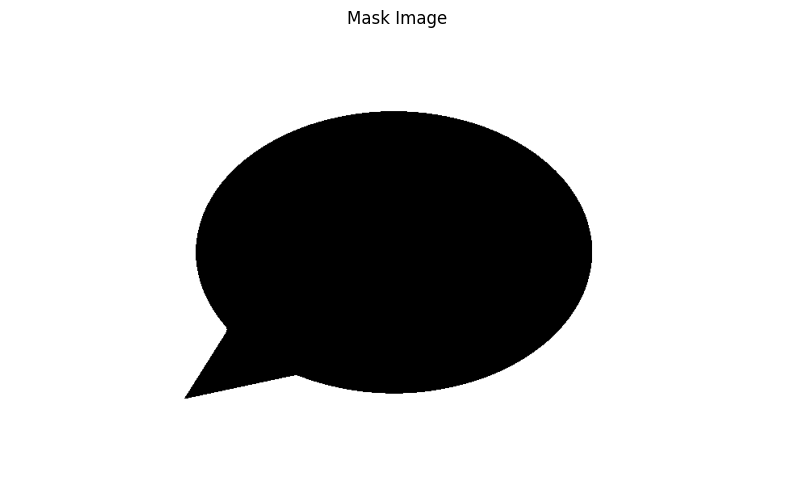

Mask shape: (540, 960, 3)
Mask dtype: uint8
Mask min value: 0
Mask max value: 255


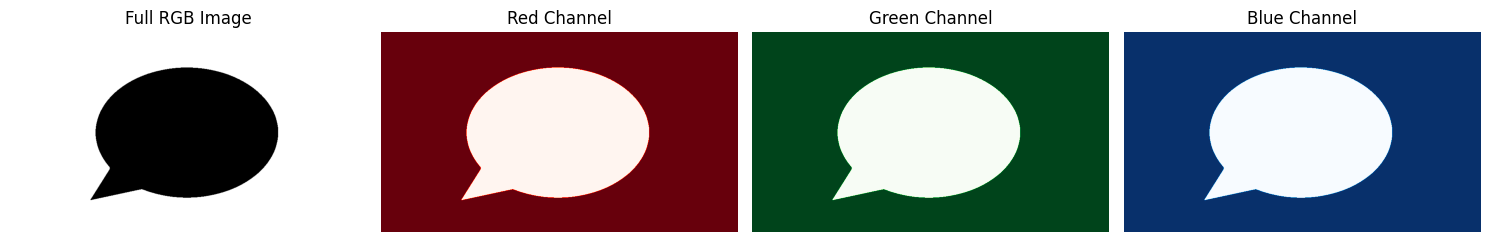

In [52]:
import matplotlib.pyplot as plt

# 檢查轉換後的遮罩圖片
plt.figure(figsize=(10, 6))
plt.imshow(mask_image)
plt.title("Mask Image")
plt.axis('off')
plt.show()

# 打印遮罩圖片的形狀和一些基本統計信息
print("Mask shape:", mask_image.shape)
print("Mask dtype:", mask_image.dtype)
print("Mask min value:", mask_image.min())
print("Mask max value:", mask_image.max())

# 如果需要查看 RGB 通道
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))
# 顯示完整的 RGB 圖像
ax1.imshow(mask_image)
ax1.set_title('Full RGB Image')
ax1.axis('off')

# 顯示紅色通道
ax2.imshow(mask_image[:,:,0], cmap='Reds')
ax2.set_title('Red Channel')
ax2.axis('off')

# 顯示綠色通道
ax3.imshow(mask_image[:,:,1], cmap='Greens')
ax3.set_title('Green Channel')
ax3.axis('off')

# 顯示藍色通道
ax4.imshow(mask_image[:,:,2], cmap='Blues')
ax4.set_title('Blue Channel')
ax4.axis('off')

plt.tight_layout()
plt.show()

# 生成文字雲

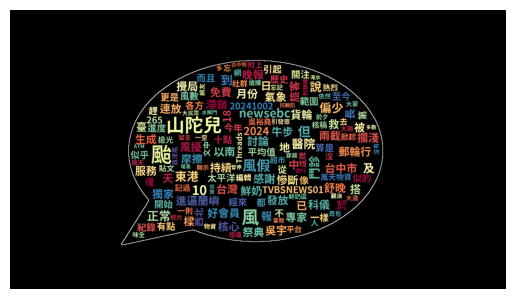

文字雲圖片已儲存為: ./img/20241002_颱風_title+desc_relative_scaling50%.png


In [53]:
# 生成文字雲

# wordcloud = WordCloud(font_path=font_path_input, width=320, height=320,max_font_size=50,max_words=4000,color_func=image_colors).generate_from_frequencies(word_count)
wordcloud = WordCloud(
    font_path=font_path_input,
    width=960,  # 增加寬度以提高畫質
    height=540,  # 增加高度以提高畫質
    mask=mask_image,
    max_font_size=40,  # 增加最大字體大小
    max_words=400,
    # color_func=image_colors,
    prefer_horizontal=0.9,  # 90% 的詞水平放置
    scale=2,  # 增加縮放比例以提高畫質
    min_font_size=10,  # 設置最小字體大小
    background_color="black",  # 設置背景顏色
    mode="RGB",
    relative_scaling=0.3,  # 平衡詞頻和詞排名的重要性
    collocations=True,  # 包含常見詞組
    colormap="Spectral",
    contour_width=0.001,  # 添加輪廓以增強視覺效果
    contour_color="white"# 設置輪廓顏色
).generate_from_frequencies(word_count_dict)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


# 儲存文字雲圖片 檔案名稱格式化
today = datetime.now().strftime('%Y%m%d')
image_filename = f"./img/{today}_{keyword}_title+desc_relative_scaling50%.png"
wordcloud.to_file(image_filename)
print(f"文字雲圖片已儲存為: {image_filename}")

## WordCloud 參數釐清

AI 回覆的內容，關於參數說明：

您提出了一個很好的問題，這確實需要進一步澄清。您是對的，排名通常是基於詞頻的，但它們在詞雲生成中的作用略有不同。讓我解釋得更清楚：

1. 排名 vs 詞頻：
   - 排名：詞的相對位置（第1常見、第2常見等）
   - 詞頻：詞出現的實際次數

2. 差異的重要性：
   - 排名只反映相對順序，不顯示頻率差距
   - 詞頻反映實際出現次數，顯示詞與詞之間的差距

3. 舉例說明：
   假設有三個詞：
   - A：出現100次（排名1）
   - B：出現99次（排名2）
   - C：出現10次（排名3）

   - 純基於排名（0.0）：A、B、C的大小差異很小
   - 純基於詞頻（1.0）：A和B幾乎一樣大，C明顯小得多

4. `relative_scaling` 的作用：
   - 0.0：主要考慮排名，A、B、C大小差異不大
   - 1.0：完全按詞頻，A、B很大且相近，C很小
   - 0.5：平衡兩者，反映排名，也部分反映頻率差異

所以，雖然排名確實基於詞頻，但 `relative_scaling` 參數允許您決定是更注重詞的相對順序（排名），還是更注重詞之間的實際頻率差異。這提供了在視覺呈現上的靈活性。

# 其他資訊確認

In [54]:
import os

print("Current working directory:", os.getcwd())
print("Font file exists:", os.path.exists(font_path_input))

Current working directory: /Users/larry/Github/Python-WordCloud
Font file exists: True


(2024/09/17更新)

- `get_news()` 函數目前返回的是 Google 頁面轉址連結
- 參考 [SuYenTing/Python-web-crawler](https://github.com/SuYenTing/Python-web-crawler/blob/main/google_real_time_news.py) 專案，使用 google-news-url-decoder 模組解決轉址問題
- `search()` 函數可以獲取真正的新聞網址
- 非英文語言搜尋時，無法返回正確的 datetime 時間格式